# MNIST Classification

######  @ author: Rohit_Raj_Jalheria

1. Introduction  
2. Data Exploration  
    2.1 Load Data  
    2.2 Check for null values  
    2.3 Understand data
3. Data Preprocessing  
    3.1 Feature Scaling / Normalization  
    3.2 Label Encoding  
4. Build Models  
    4.1  SVM  
    4.2 KNeighbors  
    4.3 Random Forest  
    4.4 Neural Network
5. Evaluate Models  
    5.1 Cross Validation   
6. Hyperparameter Tuning  
7. Predict and Submit  
    7.1 Confusion Matrix  
    7.2 Precision, Recall and F1 Scores  
    7.3 Predict and Submit Results

#  Introduction

Hello Instructors! I started this kernel right after I finished my sessions on **Classification**, and since they say "MNIST is the `hello world` of classification", I jumped into my First Project on Machine Learning to have some hands on experience.

This kernel consists of *7 main parts*, and 5th and 6th are a bit interchangeble. I will try to build 3 different models to classify MNIST images, SVM, KNN, and Random Decision Forest.

##### So let's sail !

# Data Exploration

This is the part where I get to know the data, how is it formatted, what properties it has etc.

###  Load Data

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!ls

gdrive	sample_data


In [ ]:
train = pd.read_csv("/content/gdrive/My Drive/mnist_data/mnist_train.csv")
test = pd.read_csv("/content/gdrive/My Drive/mnist_data/mnist_test.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Columns: 785 entries, 5 to 0.617
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 785 entries, 7 to 0.667
dtypes: int64(785)
memory usage: 59.9 MB


In [ ]:
train.shape

(59999, 785)

In [ ]:
train.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590,0.591,0.592,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.600,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Test set is missing one column, and that is the `label` column, since images are in the form of `28x28` we have `784` feature columns for each image.

### 2.2 Check for null values 

In [ ]:
train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [ ]:
test.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

It seems like we do not have any missing values. Perfect!

### 2.3 Split the Data

As I learned; we should always put our test set aside when we are exploring dataset, to prevent our brain to mislead us. Since we are trying to create a solution that generalizes and not memorizes, it is important to modify our data by looking at only to train set and not the test set. Test set should only be used for final evaluation.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train = train.iloc[:,1:]
x_test = test.iloc[:,1:]
y_test = test.iloc[0:, 0]
y_train = train.iloc[0:,0]


print("Training Features:", x_train.shape)
print("Training Labels:", y_train.shape)
print("Testing Features:", x_test.shape)
print("Actual Labels:", y_test.shape)
print("Test Features:", test.shape)

Training Features: (59999, 784)
Training Labels: (59999,)
Testing Features: (9999, 784)
Actual Labels: (9999,)
Test Features: (9999, 785)


### save the files

In [ ]:
x_test.to_csv('x_test.csv')
x_train.to_csv('x_train.csv')
y_test.to_csv('y_test.csv')
y_train.to_csv('y_train.csv')

### 2.4 Understand Data

In [ ]:
x_train_explore = x_train.copy()
y_train_explore = y_train.copy()

# del x_train, y_train

In [ ]:
x_test_explore = x_test.copy()
y_test_explore = y_test.copy()

In [ ]:
y_train_explore.describe()

count    59999.000000
mean         4.453924
std          2.889294
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: 5, dtype: float64

In [ ]:
y_train_explore.value_counts().describe()

count      10.000000
mean     5999.900000
std       339.694781
min      5420.000000
25%      5867.750000
50%      5936.000000
75%      6087.750000
max      6742.000000
Name: 5, dtype: float64

In [ ]:
unique_labels = np.unique(y_train_explore)
unique_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
frequency = y_train_explore.value_counts()
frequency.sort_values(ascending=False)


1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5420
Name: 5, dtype: int64

In [ ]:
type(frequency)

pandas.core.series.Series

In [ ]:
transpose = frequency.T
transpose

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5420
Name: 5, dtype: int64

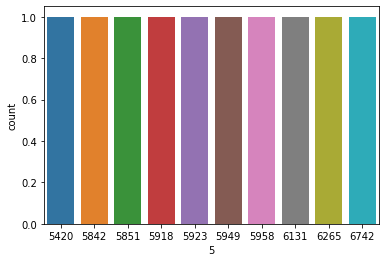

In [ ]:
sns.countplot(x=frequency.index, data=frequency)

(array([1., 0., 0., 4., 2., 1., 1., 0., 0., 1.]),
 array([5420. , 5552.2, 5684.4, 5816.6, 5948.8, 6081. , 6213.2, 6345.4,
        6477.6, 6609.8, 6742. ]),
 <a list of 10 Patch objects>)

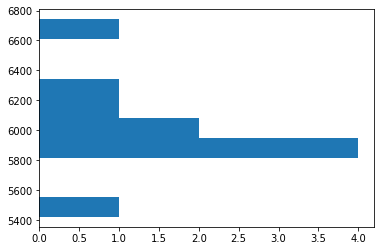

In [ ]:
plt.hist(x=frequency, orientation='horizontal')

[]

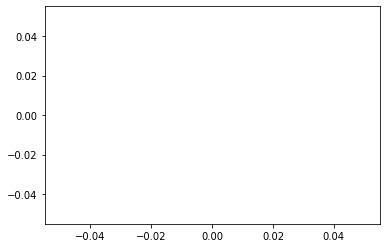

In [ ]:
plt.plot(data=frequency.value_counts(), kind='line')

It looks like only 5 is little less than 4000 and the rest is almost evenly distributed.  


We can move on.

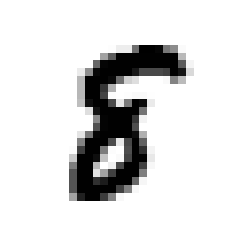

In [ ]:
sample_digit = x_train_explore.iloc[2000] # a random instance
sample_digit_image = sample_digit.values.reshape(28, 28) # reshape it from (784,) to (28,28)
plt.imshow(sample_digit_image, # plot it as an image
           cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

As you can see our data is in this given format.

# 3. Data Preprocessing

### 3.1 Feature Scaling / Normalization

Working with numerical data that is in between `0-1` is more effective for most of the machine learning algortihms than `0-255`.  
We can easily scale our features to `0-1` range by dividing to `max` value (255).

We could use `MinMaxScaler` from `sklearn.preprocessing` but since the formula for that is `(x-min)/(max-min)` and our `min` is 0, we could directly calculate `x/max` and that is `x/255`.  

This is going to give the same result. So let's do it!


In [ ]:
x_train_scaled = x_train_explore.copy()
x_train_scaled = x_train_scaled / 255.0


x_train_scaled.iloc[2]

0        0.0
0.1      0.0
0.2      0.0
0.3      0.0
0.4      0.0
        ... 
0.613    0.0
0.614    0.0
0.615    0.0
0.616    0.0
0.617    0.0
Name: 2, Length: 784, dtype: float64

In [ ]:

x_test_scaled = x_test_explore.copy()
x_test_scaled = x_test_scaled / 255.0

np.array(x_test_scaled.iloc[2]).reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
sample_scaled = np.array(x_train_scaled.iloc[2]).reshape(28,28)

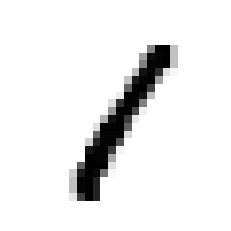

In [ ]:
plt.imshow(sample_scaled, cmap = matplotlib.cm.binary)
plt.axis('off')
plt.show()

In [ ]:
x_train = x_train_scaled.copy()
y_train = y_train_explore.copy()
x_test = x_test_scaled.copy()
y_test = y_test_explore.copy()

del x_train_explore, x_train_scaled, y_train_explore, x_test_explore, x_test_scaled, y_test_explore

# 4. Build Model

We are going to build the base models first, then we are going to try to  `fine-tune` them.

##  SVM

We are going to create the SVM model.  

SVM's SVC uses `One-versus-Rest/All (OvA/OvR)` by default, meaning that system trains 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). Then when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classifier outputs the highest score.

So to building 10 different classifiers going to take some time.

In [ ]:
# Support Vector Classification
from sklearn.svm import SVC

In [ ]:
svc_clf = SVC(gamma='auto', random_state=42, verbose=True)
svc_clf.fit(x_train, y_train)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=True)

### Evaluating SVM

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

In [ ]:
svc_prediction = svc_clf.predict(x_test)
print("SVC Accuracy:", accuracy_score(y_true=np.array(y_test) ,y_pred=svc_prediction))

SVC Accuracy: 0.9443944394439444


In [ ]:
type(y_test[:20])

pandas.core.series.Series

In [ ]:
svc_prediction

array([2, 1, 0, ..., 4, 5, 6])

In [ ]:
type(svc_prediction)

numpy.ndarray

In [ ]:
svc_prediction[:20]

array([2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9])

In [ ]:
precision_recall_fscore_support(y_test, svc_prediction)

(array([0.9593254 , 0.96804836, 0.93756098, 0.92690058, 0.93055556,
        0.92980437, 0.94683027, 0.95595596, 0.94092827, 0.94285714]),
 array([0.98673469, 0.9876652 , 0.93120155, 0.94158416, 0.95519348,
        0.9058296 , 0.96659708, 0.92989289, 0.91581109, 0.91575818]),
 array([0.97283702, 0.9777584 , 0.93437044, 0.93418468, 0.94271357,
        0.91766042, 0.95661157, 0.94274432, 0.92819979, 0.92911011]),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1027,  974, 1009]))

## Precision, Recall and F1 Scores

In [ ]:
print(classification_report(y_test, svc_prediction))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.94      0.93      0.93      1032
           3       0.93      0.94      0.93      1010
           4       0.93      0.96      0.94       982
           5       0.93      0.91      0.92       892
           6       0.95      0.97      0.96       958
           7       0.96      0.93      0.94      1027
           8       0.94      0.92      0.93       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.94      9999
   macro avg       0.94      0.94      0.94      9999
weighted avg       0.94      0.94      0.94      9999



In [ ]:
# cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("")
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### SVM with Cross validation

In [ ]:
svm_scores = cross_val_score(svc_clf,
                             x_train,
                             y_train,
                             scoring="neg_mean_squared_error",
                             cv=10,
                             verbose=10)
svm_rmse_scores = np.sqrt(-svm_scores)

print("SVM Scores\n")
display_scores(svm_rmse_scores)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[LibSVM][CV] ................................... , score=-0.908, total=14.1min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 14.1min remaining:    0.0s


[LibSVM][CV] ................................... , score=-1.081, total=13.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 27.8min remaining:    0.0s


[LibSVM][CV] ................................... , score=-1.181, total=13.2min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 40.9min remaining:    0.0s


[LibSVM][CV] ................................... , score=-0.959, total=13.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 54.5min remaining:    0.0s


[LibSVM][CV] ................................... , score=-1.004, total=13.2min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 67.7min remaining:    0.0s


[LibSVM][CV] ................................... , score=-1.115, total=13.2min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 80.9min remaining:    0.0s


[LibSVM][CV] ................................... , score=-1.091, total=13.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 94.2min remaining:    0.0s


[LibSVM][CV] ................................... , score=-1.171, total=13.2min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 107.5min remaining:    0.0s


[LibSVM][CV] ................................... , score=-1.215, total=13.2min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 120.7min remaining:    0.0s


[LibSVM][CV] ................................... , score=-0.810, total=13.4min
SVM Scores

Scores: [0.95271542 1.03979165 1.08658486 0.97920035 1.00191483 1.05577775
 1.04427008 1.08212753 1.10234598 0.90026019]

Mean: 1.0244988657270016
Standard deviation: 0.06163534103318613


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 134.1min finished


In [ ]:
# With cross validation implied, The above analysis shows that SVM is making better 
# predictions than Logistic Regression. The skill of a Machine Learning Model is decided 
# based on the Cross Validation Score.
 

# 7. Predict and Submit

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_fscore_support

In [ ]:
nn_precisions, nn_recalls, nn_f_beta_scores, nn_support = precision_recall_fscore_support(y_validation, nn_tuned_pred)
print("Precision of each class:", nn_precisions, "\n")
print("Recall of each class:", nn_recalls, "\n")
print("F Scores of each class:", nn_f_beta_scores, "\n")
print("Support of each class:", nn_support, "\n")

### Predict on Test Set

In [ ]:
final_prediction = svc_clf.predict(test)

### Submit Results

In [ ]:
svc_submission = pd.DataFrame({"ImageId": list(range(1,len(final_prediction)+1)),
                          "Label": final_prediction})

In [ ]:
svc_submission.to_csv("svc_mnist_submission.csv", index=False)